In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from pandas_datareader.data import DataReader
import yfinance as yf
from pandas_datareader import data as pdr
yf.pdr_override()

from sklearn.preprocessing import MinMaxScaler

import pyswarms as ps

from tensorflow import keras
from keras import layers, models
from keras import losses

[*********************100%%**********************]  1 of 1 completed


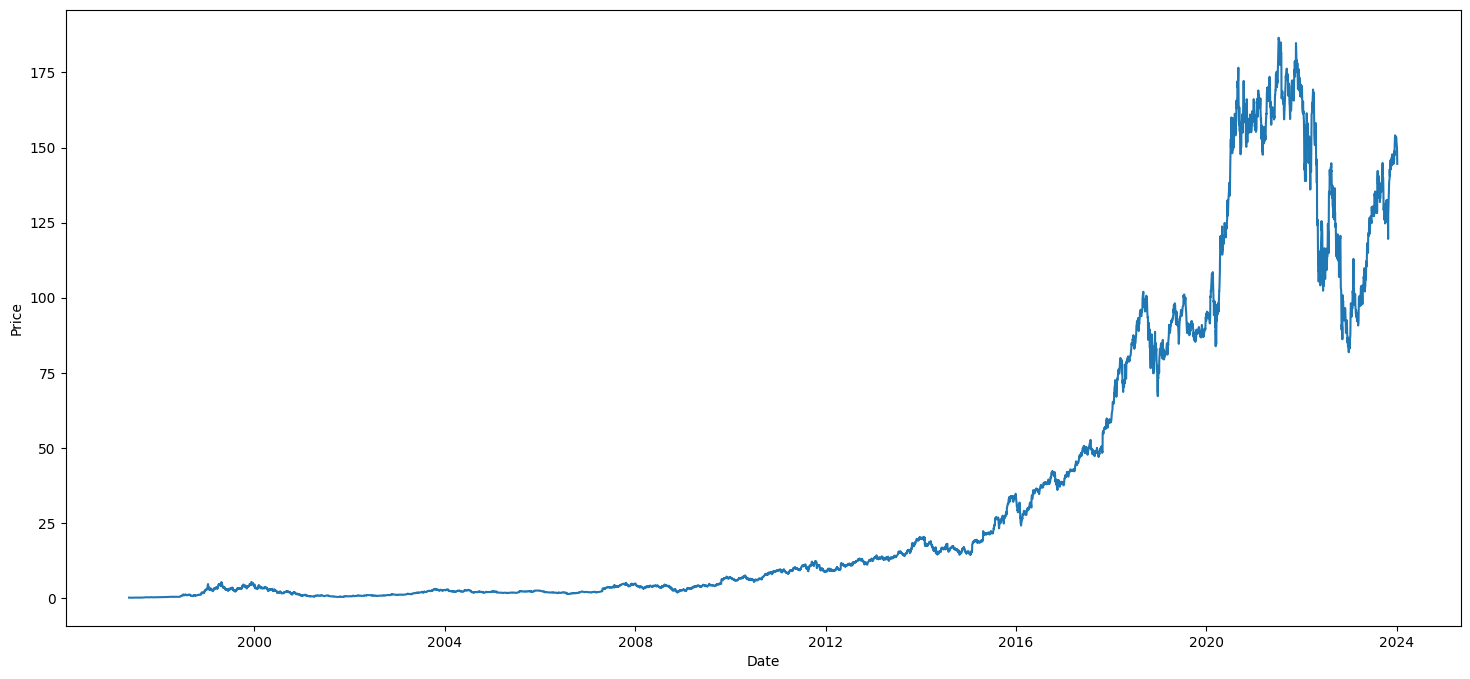

In [2]:
model = keras.models.load_model('PSO_OASiS.keras')
df = pdr.get_data_yahoo('AMZN')

plt.figure(figsize=(18,8))
plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [3]:
data = df.filter(['Close'])

dataset = data.values
scalar = MinMaxScaler(feature_range=(0,1))
scaled_dataset = scalar.fit_transform(dataset)

In [4]:
test_data = scaled_dataset[:]
x_test = []
y_test = dataset[60:]

for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    
x_test = np.array(x_test)

x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1 ))
print(x_test.shape)
predictions = model.predict(x_test)
predictions = scalar.inverse_transform(predictions)

rmse = np.sqrt(np.mean(((predictions - y_test)**2)))

rmse

(6644, 60, 1)
208/208 [==============================] - 2s 5ms/step


2.0805585166647824

C:\Users\Brandon\AppData\Local\Temp\ipykernel_21332\1878693552.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions[:,:]


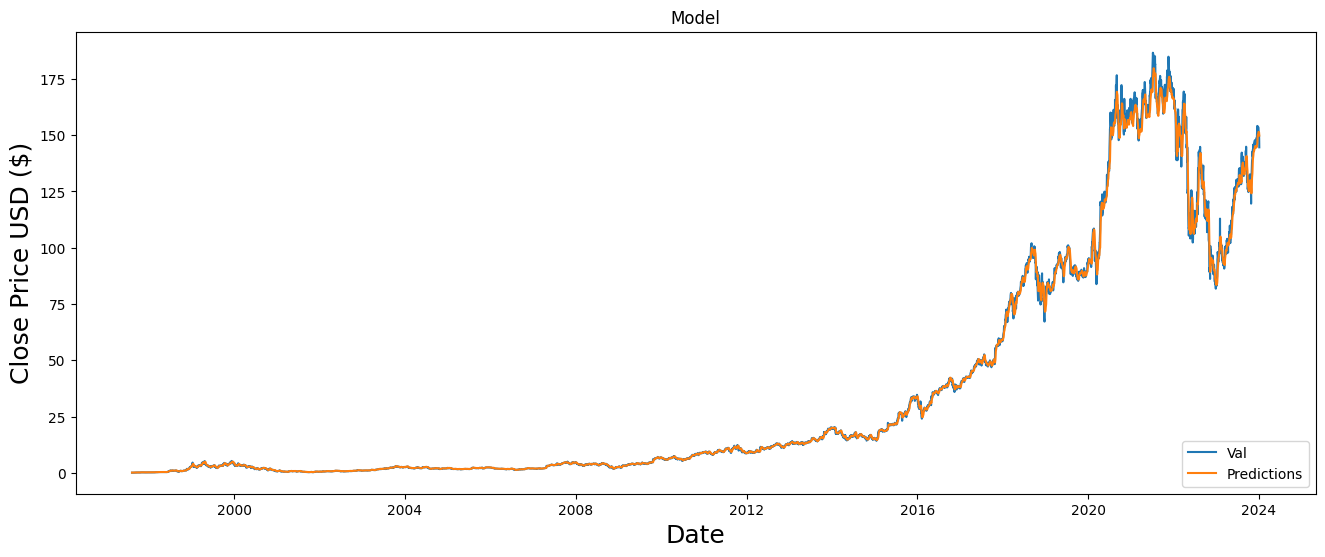

In [5]:
valid = data[60:]
valid['Predictions'] = predictions[:,:]
#Visualize the data
plt.figure(figsize=(16,6))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [6]:
valid

,Close,Predictions
Date,,
1997-08-11,0.116406,0.156823
1997-08-12,0.109896,0.157009
1997-08-13,0.109896,0.155887
1997-08-14,0.107813,0.154895
1997-08-15,0.105729,0.153611
...,...,...
2023-12-28,153.380005,151.241699
2023-12-29,151.940002,151.417892
2024-01-02,149.929993,151.248154


In [7]:
percentage_acc = lambda close, pred: (min(close, pred)/max(close, pred))*100

close_price = valid['Close'].values
pred_price = valid['Predictions'].values

percentage_lst = np.array([percentage_acc(close, pred) for close,pred in zip(close_price, pred_price)])
np.average(percentage_lst)

96.21056388500517

In [8]:
pd.DataFrame(percentage_lst)

,0
0,74.227749
1,69.993449
2,70.497045
3,69.603782
4,68.829086
...,...
6639,98.605877
6640,99.656371
6641,99.128478
6642,98.551065


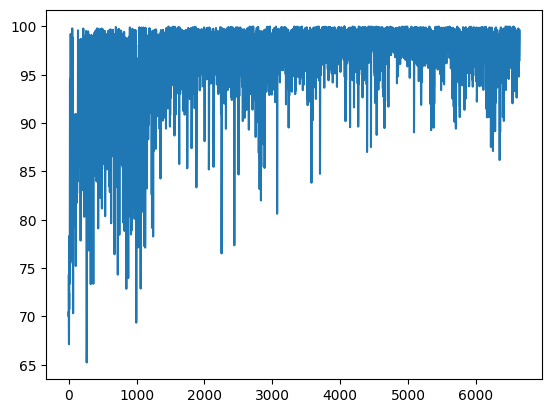

In [9]:
plt.plot(percentage_lst)
plt.show()